In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df= pd.read_excel('output_params_Phase.xlsx')

# # FCC=0, FCC+BCC=1, BCC=2

data= df.drop('Phase',axis='columns')
target= df['Phase']

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest= train_test_split(data,target,test_size=0.2,random_state=42)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
clf_rf =RandomForestClassifier(criterion ='entropy', max_depth= None, min_samples_leaf= 1, n_estimators= 200,random_state=42)
clf_dt = DecisionTreeClassifier(criterion= 'gini', max_depth=10,max_features= None,min_samples_leaf= 5,min_samples_split= 2, splitter= 'best', random_state=42)
clf_svm =SVC(C= 1, gamma= 'scale', kernel= 'linear')
clf_knn = KNeighborsClassifier(algorithm= 'auto',n_neighbors= 4, weights= 'distance')

In [4]:
clf_rf.fit(xtrain, ytrain)
clf_dt.fit(xtrain, ytrain)
clf_svm.fit(xtrain, ytrain)
clf_knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [5]:
print(clf_rf.score(xtest, ytest))
print(clf_dt.score(xtest, ytest))
print(clf_svm.score(xtest, ytest))
print(clf_knn.score(xtest, ytest))

0.9823943661971831
0.9769170579029735
0.9761345852895149
0.9753521126760564


In [44]:
print(clf_rf.score(xtrain, ytrain))
print(clf_dt.score(xtrain, ytrain))
print(clf_svm.score(xtrain, ytrain))
print(clf_knn.score(xtrain, ytrain))

1.0
0.9847402914995598
0.9755453389416022
1.0


In [6]:
ypred_rf= clf_rf.predict(xtest)
ypred_dt= clf_dt.predict(xtest)
ypred_svm= clf_svm.predict(xtest)
ypred_knn= clf_knn.predict(xtest)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       717
           1       0.96      0.98      0.97       710
           2       0.99      0.99      0.99      1129

    accuracy                           0.98      2556
   macro avg       0.98      0.98      0.98      2556
weighted avg       0.98      0.98      0.98      2556



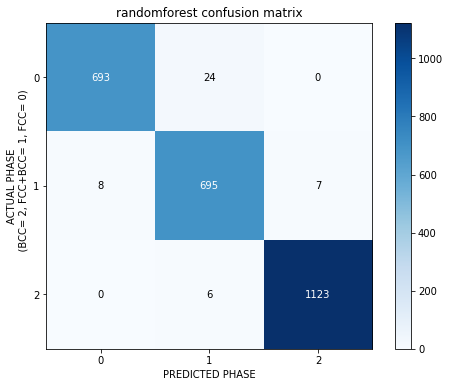

In [15]:
from sklearn.metrics import classification_report
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(ytest, ypred_rf,title='randomforest confusion matrix',normalize=False,figsize=(8,6))

plt.xlabel('PREDICTED PHASE')
plt.ylabel('''ACTUAL PHASE
            (BCC= 2, FCC+BCC= 1, FCC= 0)  ''')

print(classification_report(ytest, ypred_rf))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       717
           1       0.95      0.96      0.96       710
           2       0.99      0.99      0.99      1129

    accuracy                           0.98      2556
   macro avg       0.97      0.97      0.97      2556
weighted avg       0.98      0.98      0.98      2556



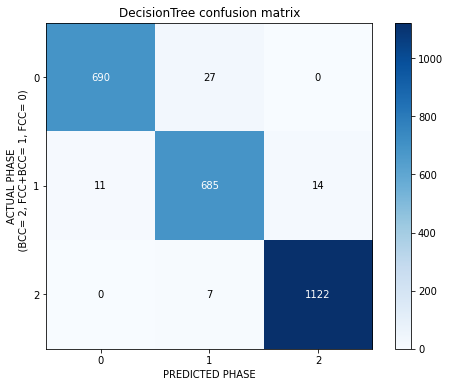

In [16]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(ytest, ypred_dt,title='DecisionTree confusion matrix',normalize=False,figsize=(8,6))

plt.xlabel('PREDICTED PHASE')
plt.ylabel('''ACTUAL PHASE
            (BCC= 2, FCC+BCC= 1, FCC= 0)  ''')

print(classification_report(ytest, ypred_dt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       717
           1       0.96      0.96      0.96       710
           2       1.00      1.00      1.00      1129

    accuracy                           0.98      2556
   macro avg       0.97      0.97      0.97      2556
weighted avg       0.98      0.98      0.98      2556



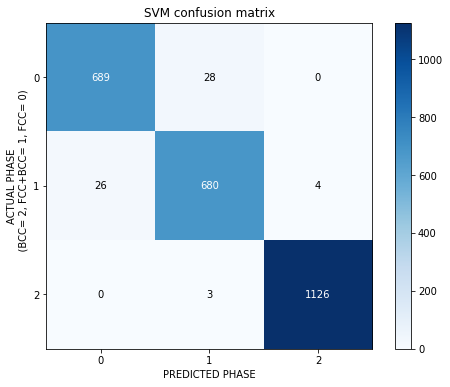

In [17]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(ytest, ypred_svm,title='SVM confusion matrix',normalize=False,figsize=(8,6))

plt.xlabel('PREDICTED PHASE')
plt.ylabel('''ACTUAL PHASE
            (BCC= 2, FCC+BCC= 1, FCC= 0)  ''')

print(classification_report(ytest, ypred_svm))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       717
           1       0.95      0.96      0.96       710
           2       0.99      0.99      0.99      1129

    accuracy                           0.98      2556
   macro avg       0.97      0.97      0.97      2556
weighted avg       0.98      0.98      0.98      2556



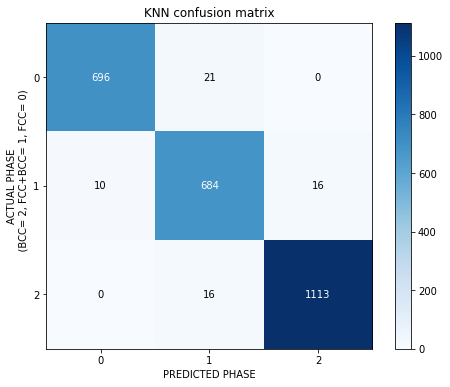

In [18]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(ytest, ypred_knn,title='KNN confusion matrix',normalize=False,figsize=(8,6))

plt.xlabel('PREDICTED PHASE')
plt.ylabel('''ACTUAL PHASE
            (BCC= 2, FCC+BCC= 1, FCC= 0)  ''')

print(classification_report(ytest, ypred_knn))

In [ ]:
#  NORMALIZED CM


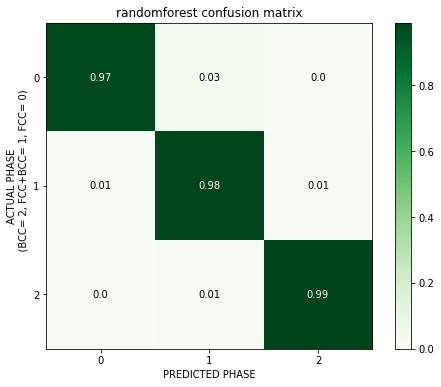

In [35]:

skplt.metrics.plot_confusion_matrix(ytest, ypred_rf,title='randomforest confusion matrix',normalize=True,figsize=(8,6), cmap='Greens')

plt.xlabel('PREDICTED PHASE')
plt.ylabel('''ACTUAL PHASE
            (BCC= 2, FCC+BCC= 1, FCC= 0)  ''')
plt.savefig('normalized_cm_rf.jpg')

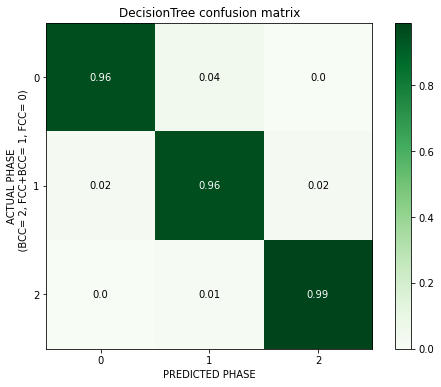

In [37]:
skplt.metrics.plot_confusion_matrix(ytest, ypred_dt,title='DecisionTree confusion matrix',normalize=True,figsize=(8,6),cmap='Greens')

plt.xlabel('PREDICTED PHASE')
plt.ylabel('''ACTUAL PHASE
            (BCC= 2, FCC+BCC= 1, FCC= 0)  ''')
plt.savefig('normalized_cm_dt.jpg')

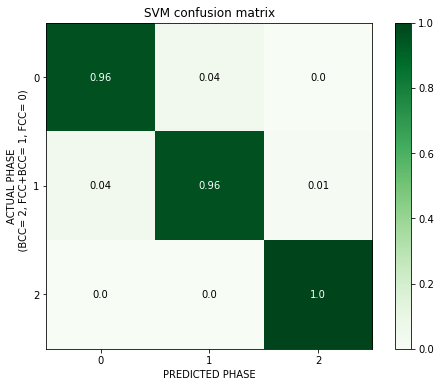

In [38]:
skplt.metrics.plot_confusion_matrix(ytest, ypred_svm,title='SVM confusion matrix',normalize=True,figsize=(8,6),cmap='Greens')

plt.xlabel('PREDICTED PHASE')
plt.ylabel('''ACTUAL PHASE
            (BCC= 2, FCC+BCC= 1, FCC= 0)  ''')
plt.savefig('normalized_cm_svm.jpg')

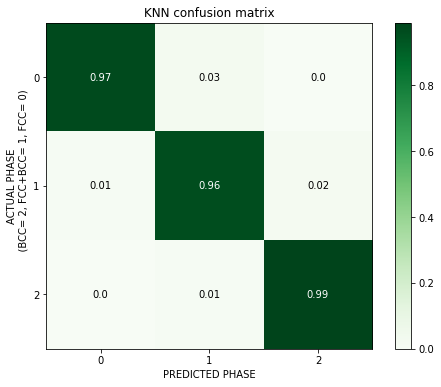

In [39]:
skplt.metrics.plot_confusion_matrix(ytest, ypred_knn,title='KNN confusion matrix',normalize=True,figsize=(8,6),cmap='Greens')

plt.xlabel('PREDICTED PHASE')
plt.ylabel('''ACTUAL PHASE
            (BCC= 2, FCC+BCC= 1, FCC= 0)  ''')
plt.savefig('normalized_cm_knn.jpg')

       importance
VEC      0.381708
Ni       0.019270
δ        0.016453
Δsₘᵢₓ    0.005517
Fe       0.004695
Tm       0.004245
ΔHₘᵢₓ    0.003619
Δχ       0.003443
Al       0.003326
Ω        0.002758
Co       0.001937
Cr       0.001702


<AxesSubplot:ylabel='importance'>

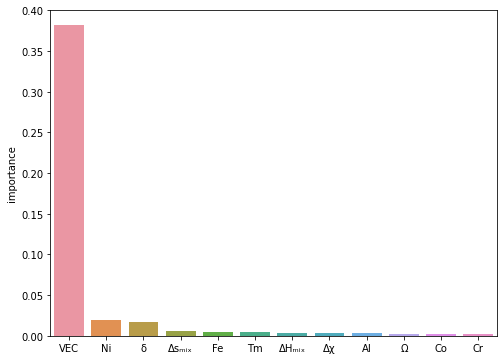

In [40]:
from sklearn.inspection import permutation_importance


pi_rf= permutation_importance(clf_rf, xtrain, ytrain,random_state=42)
result_rf=pi_rf.importances_mean

fi_rf = pd.DataFrame(result_rf, index= xtrain.columns, columns= ['importance']).sort_values('importance', ascending=False)

print(fi_rf)

import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x=fi_rf.index,y='importance',data=fi_rf)

       importance
VEC      0.538453
Al       0.156901
δ        0.042668
Fe       0.033474
Ni       0.022185
Tm       0.005047
Co       0.004265
Δsₘᵢₓ    0.004069
Δχ       0.001624
Ω        0.001604
ΔHₘᵢₓ    0.001428
Cr       0.000254


<AxesSubplot:ylabel='importance'>

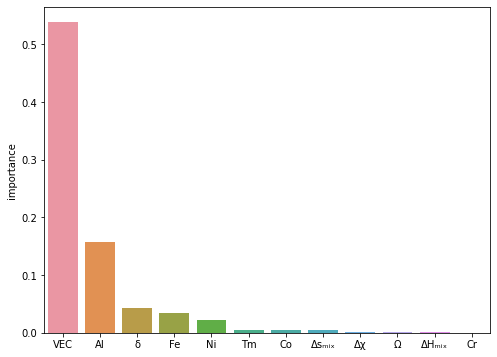

In [41]:

pi_dt= permutation_importance(clf_dt, xtrain, ytrain,random_state=42)
result_dt=pi_dt.importances_mean

fi_dt = pd.DataFrame(result_dt, index= xtrain.columns, columns= ['importance']).sort_values('importance', ascending=False)

print(fi_dt)
plt.figure(figsize=(8,6))
sns.barplot(x=fi_dt.index,y='importance',data=fi_dt)

       importance
Tm       0.478783
Ni       0.384095
Al       0.224533
Cr       0.224337
Co       0.128142
ΔHₘᵢₓ    0.101536
Fe       0.070782
Ω        0.046757
δ        0.022850
Δsₘᵢₓ    0.009156
Δχ       0.000020
VEC     -0.000685


<AxesSubplot:ylabel='importance'>

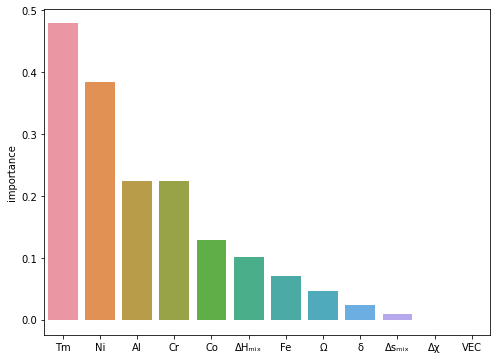

In [42]:
pi_svm= permutation_importance(clf_svm, xtrain, ytrain,random_state=42)
result_svm=pi_svm.importances_mean

fi_svm = pd.DataFrame(result_svm, index= xtrain.columns, columns= ['importance']).sort_values('importance', ascending=False)

print(fi_svm)
plt.figure(figsize=(8,6))
sns.barplot(x=fi_svm.index,y='importance',data=fi_svm)

       importance
Tm       0.432789
Ni       0.318987
Cr       0.143930
Al       0.086804
Co       0.067182
Fe       0.062878
ΔHₘᵢₓ    0.007669
δ        0.003502
Ω        0.001996
VEC      0.000919
Δsₘᵢₓ    0.000763
Δχ       0.000000


<AxesSubplot:ylabel='importance'>

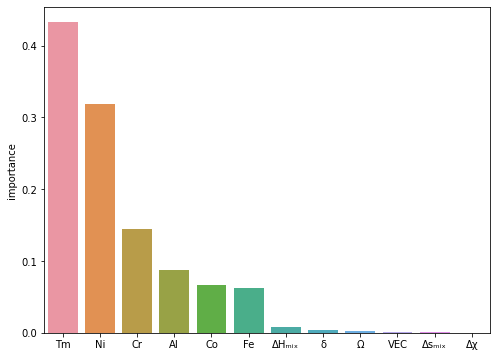

In [43]:
pi_knn= permutation_importance(clf_knn, xtrain, ytrain,random_state=42)
result_knn=pi_knn.importances_mean

fi_knn = pd.DataFrame(result_knn, index= xtrain.columns, columns= ['importance']).sort_values('importance', ascending=False)

print(fi_knn)
plt.figure(figsize=(8,6))
sns.barplot(x=fi_knn.index,y='importance',data=fi_knn)